In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Define the autoencoder class
class Autoencoder(nn.Module):
    def __init__(self, input_size, encoding_size):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, encoding_size),
            nn.ReLU()
        )
        self.decoder = nn.Sequential(
            nn.Linear(encoding_size, 64),
            nn.ReLU(),
            nn.Linear(64, input_size),
            nn.Sigmoid()  # Sigmoid for reconstruction
        )

    def forward(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

def get_user_input():
    monthly_income = float(input("Enter your monthly income: "))
    savings_till_now = float(input("Enter your savings till now: "))
    loans = float(input("Enter your loans: "))
    emi_on_loans = float(input("Enter your EMI on loans: "))
    monthly_expenses = float(input("Enter your monthly expenses: "))
    health_care_costs = float(input("Enter your health care costs: "))
    num_dependents = int(input("Enter the number of dependents: "))
    insurance_per_month = float(input("Enter your insurance per month: "))
    period_of_investment = int(input("Enter the period of investment in days (e.g., 365 for a year): "))
    risk = int(input("Enter your risk preference (1 for high, 2 for medium, 3 for low): "))

    return [monthly_income, savings_till_now, loans, emi_on_loans, monthly_expenses, health_care_costs, num_dependents, insurance_per_month, period_of_investment, risk]

def get_digit_count(number):
    return len(str(number).split('.')[0])

# Normalize user input       
user_input = get_user_input()
digit_counts = [get_digit_count(number) for number in user_input]
normalized_user_input = [number / (10 ** digit_count) for number, digit_count in zip(user_input, digit_counts)]

# Convert normalized user input to tensor
input_parameters_tensor = torch.tensor(normalized_user_input, dtype=torch.float32)

# Define parameters
input_size = len(normalized_user_input)  # Number of input parameters
encoding_size = 6  # Size to which we want to reduce the parameters

# Initialize the autoencoder
autoencoder = Autoencoder(input_size, encoding_size)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(autoencoder.parameters(), lr=0.001)

# Training loop
epochs = 1000
for epoch in range(epochs):
    # Forward pass
    reconstructed_parameters = autoencoder(input_parameters_tensor)

    # Compute the loss
    loss = criterion(reconstructed_parameters, input_parameters_tensor)

    # Backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(f"Epoch [{epoch}/{epochs}], Loss: {loss.item():.4f}")

# Print the reduced parameters
encoded_parameters = autoencoder.encoder(input_parameters_tensor)
print("Encoded Parameters:", encoded_parameters.detach().numpy())

# Retrieve original parameters using the encoded values
decoded_parameters = autoencoder.decoder(encoded_parameters)
print("Decoded Parameters:", decoded_parameters.detach().numpy())


Enter your monthly income:  45000
Enter your savings till now:  5200
Enter your loans:  2500
Enter your EMI on loans:  3000
Enter your monthly expenses:  10000
Enter your health care costs:  3000
Enter the number of dependents:  2
Enter your insurance per month:  750
Enter the period of investment in days (e.g., 365 for a year):  455
Enter your risk preference (1 for high, 2 for medium, 3 for low):  2


Epoch [0/1000], Loss: 0.0612
Epoch [100/1000], Loss: 0.0002
Epoch [200/1000], Loss: 0.0000
Epoch [300/1000], Loss: 0.0000
Epoch [400/1000], Loss: 0.0000
Epoch [500/1000], Loss: 0.0000
Epoch [600/1000], Loss: 0.0000
Epoch [700/1000], Loss: 0.0000
Epoch [800/1000], Loss: 0.0000
Epoch [900/1000], Loss: 0.0000
Encoded Parameters: [0.       0.       0.       0.       2.254443 0.      ]
Decoded Parameters: [0.45  0.52  0.25  0.3   0.1   0.3   0.2   0.75  0.455 0.2  ]


In [4]:
print(digit_counts)

[5, 4, 4, 4, 5, 4, 1, 3, 3, 1]


In [ ]:
+ 

In [3]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer

# Replace 'bert-base-uncased' with your chosen model name (e.g., 'gpt2', 'roberta-base')
model_name = 'bert-base-uncased'
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModel.from_pretrained(model_name)

# Assuming encoded_parameters_list is a list of lists
encoded_parameters_list = encoded_parameters.tolist()  # Convert tensor to list

# Convert the inner lists to strings, handling floats appropriately
encoded_parameters_strings = []
for parameter in encoded_parameters_list:
    if isinstance(parameter, list):
        encoded_parameters_strings.append(' '.join(map(str, parameter)))
    else:
        encoded_parameters_strings.append(str(parameter))

# Tokenize each parameter individually
tokenized_parameters =  tokenizer ()
tokenized_parameters = tokenizer(encoded_parameters_strings, padding='max_length', return_tensors='pt', truncation=True)

# Example: Classification head for investment strategy recommendation
class InvestmentClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(InvestmentClassifier, self).__init__()
        self.fc = nn.Linear(input_dim, num_classes)

    def forward(self, x):
        output = self.fc(x)
        return output

# Example usage (replace with your actual logic)
classifier = InvestmentClassifier(model.config.hidden_size, 3)  # 3 classes (e.g., conservative, moderate, aggressive)
# Pass input_ids to the pre-trained model
outputs = model(**tokenized_parameters)
last_hidden_state = outputs.last_hidden_state[:, 0, :]  # Take the first token's representation

# Use the last hidden state for further processing
if classifier is not None:
    logits = classifier(last_hidden_state)  # Get class logits for classification
    print(logits)  # Output the logits


ValueError: You need to specify either `text` or `text_target`.

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Define the input size
input_size = 10

# Define the architecture
encoding_dim = 5  # Size of the encoded representation

# Input placeholder
input_data = Input(shape=(input_size,))

# Encoder
encoded = Dense(encoding_dim, activation='relu')(input_data)

# Decoder
decoded = Dense(input_size, activation='sigmoid')(encoded)

# Autoencoder model
autoencoder = Model(input_data, decoded)

# Encoder model
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Input from the user
print("Please provide 10 input values:")
user_input = []
for i in range(input_size):
    value = float(input("Input {}: ".format(i + 1)))
    user_input.append(value)
user_data = np.array(user_input).reshape(1, -1)

# Train the autoencoder
autoencoder.fit(user_data, user_data, epochs=100, batch_size=16, shuffle=True)

# Use the encoder to get the encoded representation of the input
encoded_data = encoder.predict(user_data)

print("Encoded representation:", encoded_data)


Please provide 10 input values:


Input 1:  1200
Input 2:  256
Input 3:  31000
Input 4:  32000
Input 5:  69000
Input 6:  12586
Input 7:  21265
Input 8:  4520
Input 9:  1236
Input 10:  5630


Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 103441720.0000
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 99865120.0000
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 96288488.0000
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 92711856.0000
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 89135272.0000
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 85558704.0000
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 81982000.0000
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 78405352.0000
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 74828736.0000
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 71252048.0000
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 67675224.0000
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 64098392.0000
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 60521484.0000
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - loss: 56

In [5]:
print(encoded_data[0][1])

0.0


In [7]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.preprocessing import MinMaxScaler

# Define the input size
input_size = 10

# Define the architecture
encoding_dim = 5  # Size of the encoded representation

# Input placeholder
input_data = Input(shape=(input_size,))

# Encoder
encoded = Dense(8, activation='relu')(input_data)
encoded = Dense(encoding_dim, activation='relu')(encoded)

# Decoder
decoded = Dense(8, activation='relu')(encoded)
decoded = Dense(input_size, activation='sigmoid')(decoded)

# Autoencoder model
autoencoder = Model(input_data, decoded)

# Encoder model
encoder = Model(input_data, encoded)

# Compile the autoencoder
autoencoder.compile(optimizer='adam', loss='mse')

# Input from the user
print("Please provide 10 input values between 0 and 1000000000:")
user_input = []
for i in range(input_size):
    value = float(input("Input {}: ".format(i + 1)))
    user_input.append(value)

# Normalize the input data
scaler = MinMaxScaler(feature_range=(0, 1))
user_data = np.array(user_input).reshape(1, -1)
user_data_normalized = scaler.fit_transform(user_data)

# Train the autoencoder
autoencoder.fit(user_data_normalized, user_data_normalized, epochs=1000, batch_size=16, shuffle=True, verbose=0)

# Use the encoder to get the encoded representation of the input
encoded_data = encoder.predict(user_data_normalized)

print("Encoded representation:", encoded_data)


Please provide 10 input values between 0 and 1000000000:


Input 1:  100002
Input 2:  10003
Input 3:  10008
Input 4:  1002
Input 5:  3
Input 6:  11026
Input 7:  21003
Input 8:  2102
Input 9:  2023
Input 10:  2103


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Encoded representation: [[0. 0. 0. 0. 0.]]


Epoch 1/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.4723 - val_loss: 0.2674
Epoch 2/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2590 - val_loss: 0.2342
Epoch 3/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2307 - val_loss: 0.2160
Epoch 4/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2143 - val_loss: 0.2058
Epoch 5/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2065 - val_loss: 0.2020
Epoch 6/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2030 - val_loss: 0.1997
Epoch 7/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2011 - val_loss: 0.1980
Epoch 8/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1988 - val_loss: 0.1966
Epoch 9/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1975 - val_loss: 0.1956
Epoch 10/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1963 - val_loss: 0.1946
Epoch 11/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.1955 - val_loss: 0.1937
Epoch 12/50
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

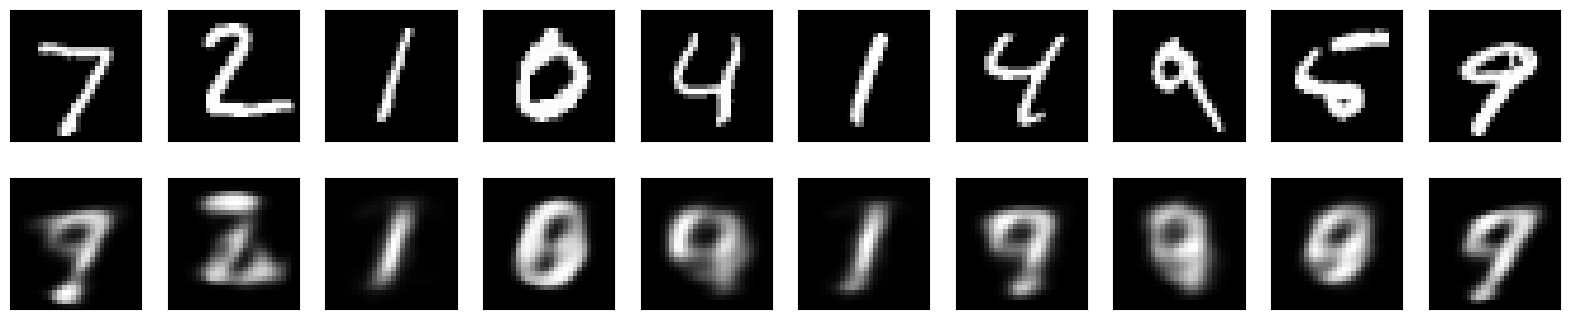

Enter input 1 (0-999999999):  1033
Enter input 2 (0-999999999):  1024
Enter input 3 (0-999999999):  3021
Enter input 4 (0-999999999):  5230
Enter input 5 (0-999999999):  1563
Enter input 6 (0-999999999):  3215
Enter input 7 (0-999999999):  22223
Enter input 8 (0-999999999):  6542
Enter input 9 (0-999999999):  222
Enter input 10 (0-999999999):  3


InvalidArgumentError: Graph execution error:

Detected at node functional_21_1/dense_10_1/Relu defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\bharg\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\bharg\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\bharg\anaconda3\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\bharg\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\bharg\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\bharg\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\bharg\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\bharg\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\bharg\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\bharg\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\bharg\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\bharg\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\bharg\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\bharg\AppData\Local\Temp\ipykernel_5576\231749788.py", line 79, in <module>

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 513, in predict

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 212, in one_step_on_data_distributed

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 201, in one_step_on_data

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 93, in predict_step

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 816, in __call__

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 42, in __call__

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 157, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 188, in call

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\ops\function.py", line 153, in _run_through_graph

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\models\functional.py", line 572, in call

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\layers\layer.py", line 816, in __call__

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\ops\operation.py", line 42, in __call__

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 157, in error_handler

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py", line 141, in call

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "C:\Users\bharg\anaconda3\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 16, in relu

Matrix size-incompatible: In[0]: [1,10], In[1]: [784,5]
	 [[{{node functional_21_1/dense_10_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_67389]

In [9]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load and preprocess the dataset
(x_train, _), (x_test, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# Define the autoencoder model
encoding_dim = 5
input_img = tf.keras.Input(shape=(784,))
encoded = tf.keras.layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = tf.keras.layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = tf.keras.Model(input_img, decoded)

# Create separate encoder model
encoder = tf.keras.Model(input_img, encoded)

# Create separate decoder model
encoded_input = tf.keras.Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = tf.keras.Model(encoded_input, decoder_layer(encoded_input))

# Compile the model
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Encode and decode some digits
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

# Plot the reconstructed digits
n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

# Convert 10 inputs to encoded parameters in the range [0, 999999999]
def scale_to_range(inputs, min_val, max_val, new_min, new_max):
    scaled_values = []
    for val in inputs:
        scaled_val = ((val - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min
        scaled_values.append(scaled_val)
    return scaled_values

# Take 10 inputs from the user
user_inputs = []
for i in range(10):
    user_input = int(input(f"Enter input {i + 1} (0-999999999): "))
    user_inputs.append(user_input)

# Scale the inputs to fit the model range
scaled_inputs = scale_to_range(user_inputs, 0, 999999999, 0, 1)

# Encode the inputs
encoded_inputs = encoder.predict(np.array([scaled_inputs]))

print("\nEncoded Parameters:")
print(encoded_inputs)


In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
import requests
from bs4 import BeautifulSoup
import re

# User Input Handling
def get_user_input():
    income = float(input("Enter your annual income: "))
    loan_details = {}
    num_loans = int(input("Enter the number of loans you have: "))
    for i in range(num_loans):
        loan_principal = float(input(f"Enter the principal amount for loan {i+1}: "))
        loan_interest = float(input(f"Enter the interest rate for loan {i+1} (%): "))
        loan_details[f"loan_{i+1}"] = (loan_principal, loan_interest / 100)
    total_savings = float(input("Enter your total savings: "))
    num_dependents = int(input("Enter the number of dependents: "))
    monthly_expenses = float(input("Enter your monthly expenses: "))
    investment_duration = int(input("Enter your desired investment duration (in years): "))
    risk_tolerance = input("Enter your risk tolerance (low/medium/high): ")
    return income, loan_details, total_savings, num_dependents, monthly_expenses, investment_duration, risk_tolerance

# Feature Engineering
def preprocess_data(user_input):
    income, loan_details, total_savings, num_dependents, monthly_expenses, investment_duration, risk_tolerance = user_input
    features = [income, total_savings, num_dependents, monthly_expenses, investment_duration]
    for loan in loan_details.values():
        features.extend(loan)
    if risk_tolerance == "low":
        risk_score = 0.2
    elif risk_tolerance == "medium":
        risk_score = 0.5
    else:
        risk_score = 0.8
    features.append(risk_score)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform([features])
    return scaled_features

# Transformer Model for Time Series Data
def build_transformer_model(input_dim, output_dim):
    inputs = Input(shape=(None, input_dim))
    encoder_layer = TransformerEncoder(MultiHeadAttention(num_heads=8, key_dim=64), norm_epsilon=1e-6, dropout=0.1)
    x = encoder_layer(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.1)(x)
    decoder_layer = TransformerDecoder(MultiHeadAttention(num_heads=8, key_dim=64), norm_epsilon=1e-6, dropout=0.1)
    x = decoder_layer(x)
    x = LayerNormalization()(x)
    outputs = Dense(output_dim, activation='linear')(x)
    model = Model(inputs, outputs)
    return model

# Web Scraping for Financial Data
def scrape_financial_data():
    url = "https://www.nseindia.com/market-data/live-equity-market"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract stock data
    stock_data = []
    table = soup.find('table', {'id': 'data_table_Market'})
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:
            cols = row.find_all('td')
            if cols:
                stock_name = cols[0].text.strip()
                stock_price = float(cols[3].text.replace(',', ''))
                stock_data.append({'name': stock_name, 'price': stock_price})

    return stock_data

# Recommendation Generation
def generate_recommendations(user_input, financial_data):
    scaled_features = preprocess_data(user_input)

    # Prepare financial data for Transformer model
    stock_prices = [data['price'] for data in financial_data]
    input_sequence = np.array(stock_prices[-60:]).reshape(1, 60, 1)  # Using last 60 days' data

    transformer_model = build_transformer_model(input_dim=1, output_dim=1)
    predictions = transformer_model.predict(input_sequence)

    # Rank and select the top recommendations
    stock_recommendations = sorted(financial_data, key=lambda x: x['price'], reverse=True)[:10]
    top_recommendations = [f"{recommendation['name']} (Price: {recommendation['price']})" for recommendation in stock_recommendations]

    return top_recommendations

# Main Loop
if __name__ == "__main__":
    user_input = get_user_input()
    financial_data = scrape_financial_data()
    recommendations = generate_recommendations(user_input, financial_data)
    print("Top Investment Recommendations:")
    for i, recommendation in enumerate(recommendations, start=1):
        print(f"{i}. {recommendation}")

Enter your annual income:  2500000
Enter the number of loans you have:  2
Enter the principal amount for loan 1:  200000
Enter the interest rate for loan 1 (%):  3
Enter the principal amount for loan 2:  60000
Enter the interest rate for loan 2 (%):  2
Enter your total savings:  600000
Enter the number of dependents:  2
Enter your monthly expenses:  62000
Enter your desired investment duration (in years):  3
Enter your risk tolerance (low/medium/high):  low


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Model
from keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout
import requests
from bs4 import BeautifulSoup
import re

# User Input Handling
def get_user_input():
    income = float(input("Enter your annual income: "))
    loan_details = {}
    num_loans = int(input("Enter the number of loans you have: "))
    for i in range(num_loans):
        loan_principal = float(input(f"Enter the principal amount for loan {i+1}: "))
        loan_interest = float(input(f"Enter the interest rate for loan {i+1} (%): "))
        loan_details[f"loan_{i+1}"] = (loan_principal, loan_interest / 100)
    total_savings = float(input("Enter your total savings: "))
    num_dependents = int(input("Enter the number of dependents: "))
    monthly_expenses = float(input("Enter your monthly expenses: "))
    investment_duration = int(input("Enter your desired investment duration (in years): "))
    risk_tolerance = input("Enter your risk tolerance (low/medium/high): ")
    return income, loan_details, total_savings, num_dependents, monthly_expenses, investment_duration, risk_tolerance

# Feature Engineering
def preprocess_data(user_input):
    income, loan_details, total_savings, num_dependents, monthly_expenses, investment_duration, risk_tolerance = user_input
    features = [income, total_savings, num_dependents, monthly_expenses, investment_duration]
    for loan in loan_details.values():
        features.extend(loan)
    if risk_tolerance == "low":
        risk_score = 0.2
    elif risk_tolerance == "medium":
        risk_score = 0.5
    else:
        risk_score = 0.8
    features.append(risk_score)
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform([features])
    return scaled_features

# Transformer Model for Time Series Data
def build_transformer_model(input_dim, output_dim):
    inputs = Input(shape=(None, input_dim))
    encoder_layer = TransformerEncoder(MultiHeadAttention(num_heads=8, key_dim=64), norm_epsilon=1e-6, dropout=0.1)
    x = encoder_layer(inputs)
    x = LayerNormalization()(x)
    x = Dropout(0.1)(x)
    decoder_layer = TransformerDecoder(MultiHeadAttention(num_heads=8, key_dim=64), norm_epsilon=1e-6, dropout=0.1)
    x = decoder_layer(x)
    x = LayerNormalization()(x)
    outputs = Dense(output_dim, activation='linear')(x)
    model = Model(inputs, outputs)
    return model

# Web Scraping for Financial Data
def scrape_financial_data():
    url = "https://www.nseindia.com/market-data/live-equity-market"
    response = requests.get(url)
    soup = BeautifulSoup(response.text, "html.parser")

    # Extract stock data
    stock_data = []
    table = soup.find('table', {'id': 'data_table_Market'})
    if table:
        rows = table.find_all('tr')
        for row in rows[1:]:
            cols = row.find_all('td')
            if cols:
                stock_name = cols[0].text.strip()
                stock_price = float(cols[3].text.replace(',', ''))
                stock_data.append({'name': stock_name, 'price': stock_price})

    return stock_data

# Recommendation Generation
def generate_recommendations(user_input, financial_data):
    scaled_features = preprocess_data(user_input)

    # Prepare financial data for Transformer model
    stock_prices = [data['price'] for data in financial_data]
    input_sequence = np.array(stock_prices[-60:]).reshape(1, 60, 1)  # Using last 60 days' data

    transformer_model = build_transformer_model(input_dim=1, output_dim=1)
    predictions = transformer_model.predict(input_sequence)

    # Rank and select the top recommendations
    stock_recommendations = sorted(financial_data, key=lambda x: x['price'], reverse=True)[:10]
    top_recommendations = [f"{recommendation['name']} (Price: {recommendation['price']})" for recommendation in stock_recommendations]

    return top_recommendations

# Main Loop
if __name__ == "__main__":
    user_input = get_user_input()
    financial_data = scrape_financial_data()
    recommendations = generate_recommendations(user_input, financial_data)
    print("Top Investment Recommendations:")
    for i, recommendation in enumerate(recommendations, start=1):
        print(f"{i}. {recommendation}")

Enter your annual income:  230000
Enter the number of loans you have:  2
Enter the principal amount for loan 1:  1230
Enter the interest rate for loan 1 (%):  3
Enter the principal amount for loan 2:  12530
Enter the interest rate for loan 2 (%):  21
Enter your total savings:  2155
Enter the number of dependents:  4
Enter your monthly expenses:  1556
Enter your desired investment duration (in years):  13
Enter your risk tolerance (low/medium/high):  low


ConnectionError: ('Connection aborted.', RemoteDisconnected('Remote end closed connection without response'))

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Function to fetch historical stock data
def fetch_historical_data(stock_symbol, start_date, end_date):
    stock_data = yf.download(stock_symbol, start=start_date, end=end_date)
    return stock_data

# Function to preprocess the stock data
def preprocess_data(stock_data):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(stock_data)
    return scaled_data

# Split the data into training and validation sets
def split_data(scaled_data, split_ratio=0.8):
    split_index = int(len(scaled_data) * split_ratio)
    train_data = scaled_data[:split_index]
    val_data = scaled_data[split_index:]
    return train_data, val_data

# Transformer Model for Time Series Data
class TransformerModel(keras.Model):
    def __init__(self, input_dim, output_dim, num_heads=8, ff_dim=512, dropout_rate=0.1):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.output_dim = output_dim
        self.num_heads = num_heads
        self.ff_dim = ff_dim
        self.dropout_rate = dropout_rate

        self.encoder_layer = layers.TransformerEncoder(
            layers.TransformerEncoderLayer(
                self.ff_dim, self.num_heads, dropout_rate=self.dropout_rate
            ),
            norm_layer=layers.LayerNormalization(),
        )

        self.decoder_layer = layers.TransformerDecoder(
            layers.TransformerDecoderLayer(
                self.ff_dim, self.num_heads, dropout_rate=self.dropout_rate
            ),
            norm_layer=layers.LayerNormalization(),
        )

        self.output_layer = layers.Dense(self.output_dim)

    def call(self, inputs, training=None):
        encoder_output = self.encoder_layer(inputs, training=training)
        decoder_output = self.decoder_layer(encoder_output, encoder_output, training=training)
        output = self.output_layer(decoder_output)
        return output

# Train the Transformer model
def train_transformer_model(train_data, val_data):
    input_dim = train_data.shape[-1]
    output_dim = 1

    transformer_model = TransformerModel(input_dim, output_dim)

    optimizer = keras.optimizers.Adam(learning_rate=0.001)
    loss_fn = keras.losses.MeanSquaredError()

    transformer_model.compile(optimizer=optimizer, loss=loss_fn)

    callbacks = [
        keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    ]

    transformer_model.fit(
        train_data, train_data[:, 1:, :],
        validation_data=(val_data, val_data[:, 1:, :]),
        epochs=100,
        batch_size=32,
        callbacks=callbacks
    )

    return transformer_model

# Main function
if __name__ == "__main__":
    # Fetch historical stock data for a specific stock or index (e.g., Nifty 50)
    start_date = "2018-01-01"
    end_date = "2023-05-10"
    stock_symbol = "^NSEI"  # Nifty 50 index
    stock_data = fetch_historical_data(stock_symbol, start_date, end_date)

    # Preprocess the stock data
    scaled_data = preprocess_data(stock_data)

    # Split the data into training and validation sets
    train_data, val_data = split_data(scaled_data)

    # Train the Transformer model
    trained_model = train_transformer_model(train_data, val_data)

    # Save the trained model
    trained_model.save("transformer_model.h5")

[*********************100%%**********************]  1 of 1 completed


AttributeError: module 'keras._tf_keras.keras.layers' has no attribute 'TransformerEncoder'

In [4]:
pip install keras-nlp

  Obtaining dependency information for keras-nlp from https://files.pythonhosted.org/packages/3f/7b/cddb18e4c1f7729bf8cbeb51cc3ab26dedb377a91bc2d059461adf5e2d48/keras_nlp-0.11.1-py3-none-any.whl.metadata
  Obtaining dependency information for keras-core from https://files.pythonhosted.org/packages/95/f7/b8dcff937ea64f822f0d3fe8c6010793406b82d14467cd0e9eecea458a40/keras_core-0.1.7-py3-none-any.whl.metadata
  Obtaining dependency information for kagglehub from https://files.pythonhosted.org/packages/bb/d5/f650605faef0c87df34db89dd548d1b529f7a09852df8a8e767c396e4e0c/kagglehub-0.2.5-py3-none-any.whl.metadata
INFO: pip is looking at multiple versions of keras-nlp to determine which version is compatible with other requirements. This could take a while.
  Obtaining dependency information for keras-nlp from https://files.pythonhosted.org/packages/e4/db/87bc5695a8089241952ee6b2d68cc9c09e67604a1360cb9606a06201012b/keras_nlp-0.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\bharg\\anaconda3\\Lib\\site-packages\\tensorflow\\compiler\\mlir\\quantization\\tensorflow\\python\\pywrap_function_lib.pyd'
Consider using the `--user` option or check the permissions.

